### Case study : Credit card risk analysis

https://leaps.analyttica.com/home for datasets 


# 2.PROBLEM STATEMENT 




 

#### prob statement : "What marketing startegy can help reduce customer churn ?"  
#### Audience : marketing dept


## 3. DATA COLLECTION CLEANING AND TRANSFORMATION

kaggle : Credit Card Customers Prediction https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction

Template : https://cuddly-adventure-p9v994rjxr9h7prg.github.dev/

 16.07% of customers who have churned. Thus a bit difficult to train model to predict churning customers.18 features 



#### Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
data=pd.read_csv("BankChurners.csv")

In [4]:

data.shape

(10127, 23)

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Seems 23 columns unlike 18 in data description; so dataset migh have been updated

In [6]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Data Cleaning: Convert incorrect variable datatypes,drop/impute missing values,fix erroneous data, handle outliers

#### General Cleaning:Checking duplicates 


In [7]:
data.shape
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
data['CLIENTNUM'].nunique()

10127

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(10127, 23)

In [11]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

#### Subsetting data 

In [12]:
# remove extra columns 
data=data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [13]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Missing Values

In [14]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [15]:
# To understand excatly which rows have missing values
data[data['Education_Level'].isna()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


if there was missing values, to remove it use fillna

In [16]:
data['Education_Level']=data['Education_Level'].fillna("Unknown")
data['Marital_Status']=data['Marital_Status'].fillna("Unknown")
data['Income_Category']=data['Income_Category'].fillna("Unknown")
# here already the kaggle dataset has been updated with "unknown" for missing values ..so no missing values shown

So till here data subsetted ,dtypes,duplicates and missing values handled 

#### Transformation:Binning
##### (default bin =10)
for creatung variables that we may need later : here ,say ages of customers in groups would be beneficial

In [17]:
print(data['Customer_Age'].min())
print(data['Customer_Age'].max())

26
73


In [18]:
bins=[25,30,40,50,60,70,80]
labels=[ '20s','30s','40s','50s','60s','70s']

In [19]:
data['Customer_Age_bins']=pd.cut(data['Customer_Age'],bins=bins,labels=labels,include_lowest=True,right=False)
data
# # righ=, default True  Indicates whether bins includes the rightmost edge . 
# If right == True (the default), then the bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4]

# Eg. to verify 30s
data[data['Customer_Age_bins']=='30s']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_bins
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,30s
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,30s
13,816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195,30s
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209,30s
62,711481533,Existing Customer,39,M,1,High School,Divorced,$60K - $80K,Blue,33,...,3,5926.0,1251,4675.0,0.944,1316,28,1.154,0.211,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,719848008,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,...,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000,30s
10102,720608658,Existing Customer,33,F,1,Uneducated,Single,Less than $40K,Blue,36,...,3,8398.0,1875,6523.0,0.727,16706,123,0.757,0.223,30s
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,...,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,30s
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,...,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276,30s


# 4. Exploratory Data Analysis


### Intro

In [20]:
# Verifying churn rate
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [21]:
data['Attrition_Flag'].value_counts()['Attrited Customer']

1627

In [22]:
data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0] #gives total rows in the dataset;1 for column

0.1606596227905599

In [23]:
print(round(data['Attrition_Flag'].value_counts()['Attrited Customer']/data.shape[0]*100,2),"% customer churned" )

16.07 % customer churned


### Summary Statistics


Typically, we are looking to understand:

    1) how many instances are in the dataset (frequency or counts) 
    2) a measure of central tendency (mean, median, mode)
    3) the spread of the dataset (variance, standard deviation)
    The **Mean** is the average of all values in a dataset, while the **Median** represents the midpoint of the values (50% above and 50% below. 

In [24]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Here we can see things like: 

    1) The longest customer in this dataset has been around for 56 months or about 4 years and a half. (Max)
    2) The average number of relationships a customer has is ~4. (Mean and median agree here)
    3) The average credit limit is $8.6K, but the median credit limit is much lower at $4.5K. (signals some skew in this variable) 

In [25]:
print('The average Credit_Limit is $', round(np.mean(data['Credit_Limit']),2),  'and the median is $', round(np.median(data['Credit_Limit']),2))

The average Credit_Limit is $ 8631.95 and the median is $ 4549.0


In [26]:
print('The average Total_Relationship_Count is $', round(np.mean(data['Total_Relationship_Count']),2),  'and the median is $', round(np.median(data['Total_Relationship_Count']),2))

The average Total_Relationship_Count is $ 3.81 and the median is $ 4.0


### Distributions
1.Customer age 

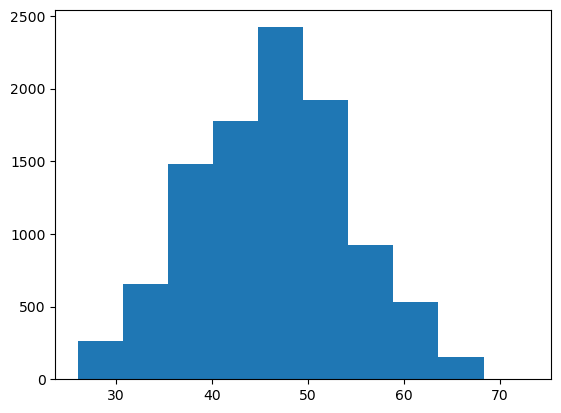

In [27]:
plt.hist(data['Customer_Age']);
# ; to remove the description below : 

So Cutomer age is normally distributed

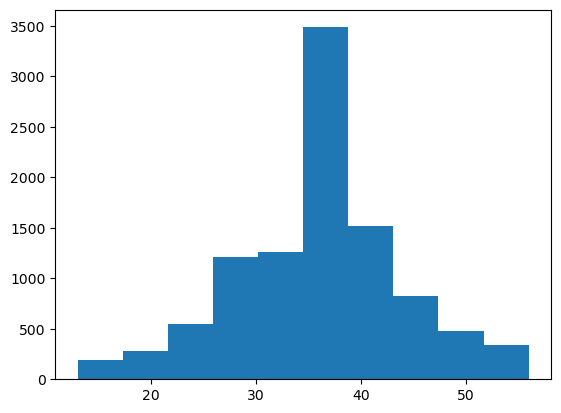

In [28]:
# 2.Months on book
plt.hist(data['Months_on_book']);

follow up on this with respective dept. oto understand more ; since most customers are joined 36 months ago

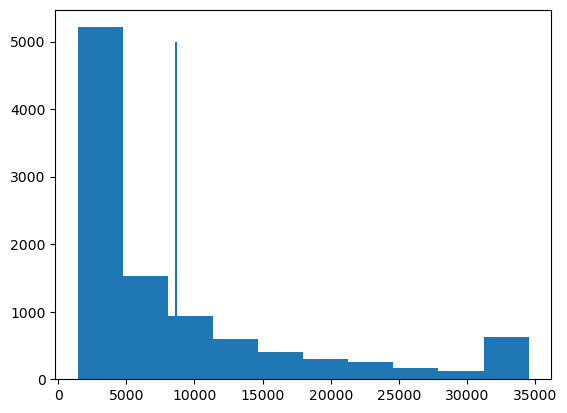

In [29]:
# 3. Credit Limit
plt.hist(data['Credit_Limit']);
plt.vlines(data['Credit_Limit'].mean(),0,5000); # add vertical lines at  mean and median from 0 to 5000
plt.vlines(data['Credit_Limit'].median(),0,5000);

vline coiincides ;so mean and median same . but we know they are 8.6k amd 4.5k resp. SO lets improve this plot to understand better like increae the bins to see mean and median sperate

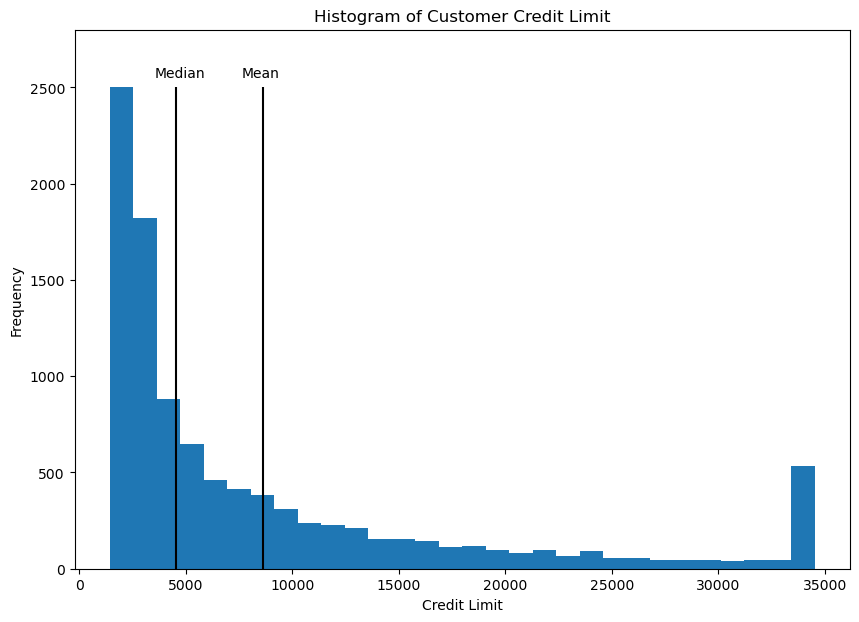

In [30]:
plt.figure(figsize=(10,7))
plt.hist(data['Credit_Limit'], bins=30);

plt.vlines(data['Credit_Limit'].mean(), 0, 2500, colors='Black')
plt.vlines(data['Credit_Limit'].median(), 0, 2500, colors='Black')
plt.text(data['Credit_Limit'].mean()-1000, 2500+50, "Mean") #adds text annotation "Mean" just above the mean value. 
# The data['Credit_Limit'].mean()-1000 determines the x-coordinate of the annotation, and 2500+50 determines the y-coordinate.
plt.text(data['Credit_Limit'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800);
plt.title("Histogram of Customer Credit Limit");
plt.ylabel('Frequency');
plt.xlabel('Credit Limit');



So this validates cred limit is a right skewed variable; mean is skewed to right cz few cust have high cred limits. 

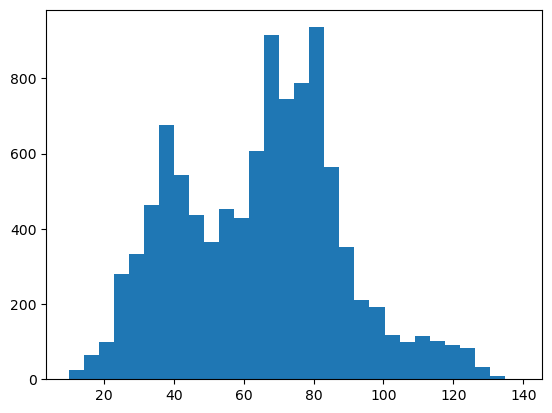

In [31]:
# 4.Total transac count
plt.hist(data['Total_Trans_Ct'],bins=30);

2 peaks observed showing there may be 2 groups

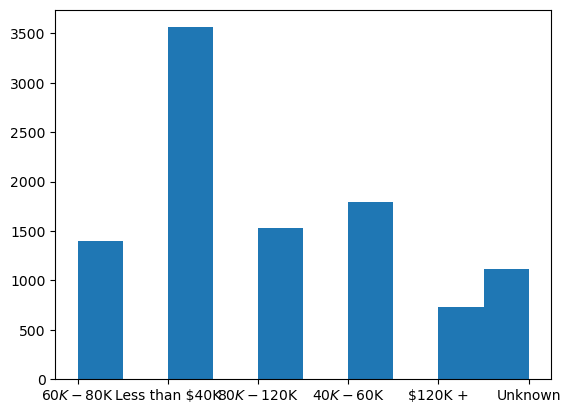

In [32]:
# 5.Income_Category
plt.hist(data['Income_Category']); #so mostly less than 40k category 

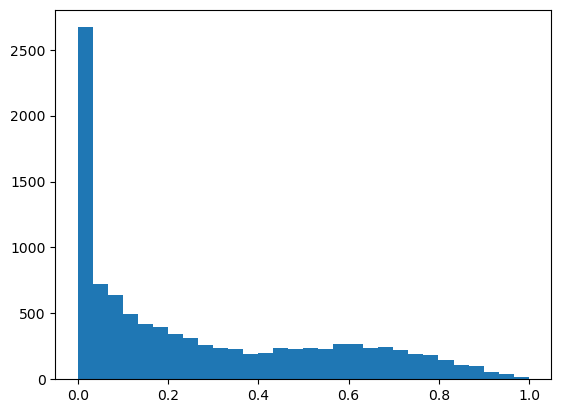

In [33]:
plt.hist(data['Avg_Utilization_Ratio'],bins=30);
#amount owed/cred limit

Infer : most have not utilized credit yet 

## Data Transformations: Normalization and Log
We will cover two very common transformations:

    1) Normalization (also referred to as a min-max scaler): Normalization will convert all data points to values between two values (usually 0 and 1). 
    2) Log transformation: This helps make the data "less skewed". When using log with Python, the default base is usually e.

In [34]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower) #Formula
    return y

In [35]:
#normalization
data['Credit_Limit_Normalized'] = normalize(data['Credit_Limit'])
# Log transform uses numpy 
data['Credit_Limit_Log_Transformed'] = np.log(data['Credit_Limit'])

we will use seaborn subplots to plot them side by side using `subplots`

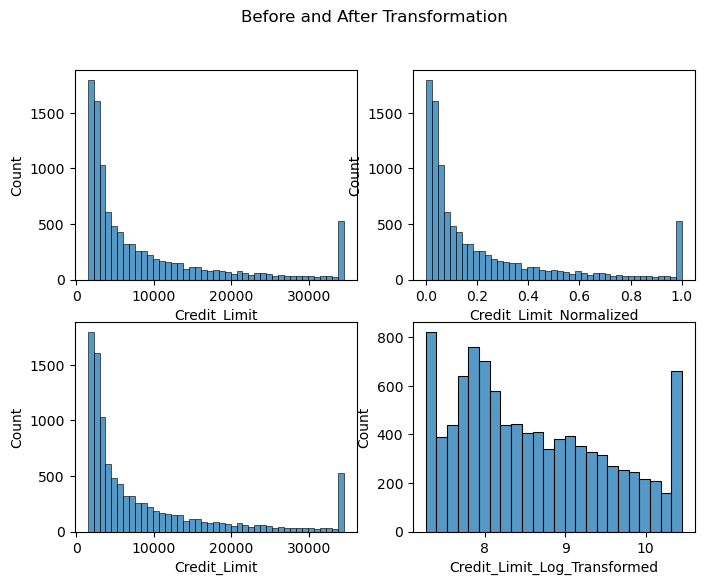

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))
fig.suptitle('Before and After Transformation') #supertitle 

#create boxplot in each subplot
sns.histplot(data, x="Credit_Limit", ax=axes[0,0])
sns.histplot(data, x="Credit_Limit_Normalized", ax=axes[0,1])
sns.histplot(data, x="Credit_Limit", ax=axes[1,0])
sns.histplot(data, x="Credit_Limit_Log_Transformed", ax=axes[1,1]);

So log transform does better normlaized dist. btwn 0 and 1

### Other dist charts
Box and whisker charts ;  allows to quickly find and identify the median, quartiles and any outliers. 

& Pyramid charts


<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

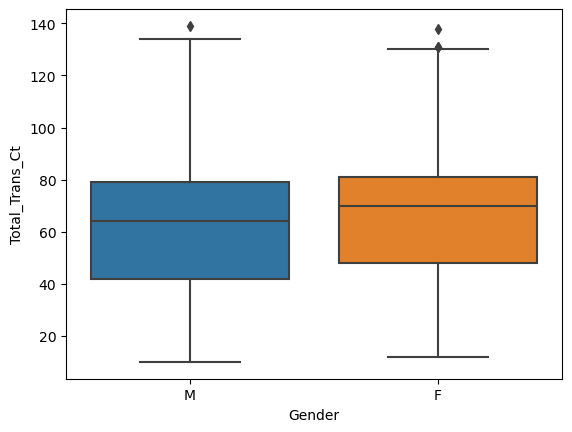

In [40]:
sns.boxplot(x=data["Gender"], y=data['Total_Trans_Ct']) #median for frmale is higher than male

median transaction count is slightly higher for females than males and outliers seem to be present among both groups.

#Pyramid chart

distribution of customers by age and gender? A Pyramid chart

Uses plotly :  an interactive visualization package to pull this one off. 

There's a nice example we will follow (https://plotly.com/python/v3/population-pyramid-charts/). 



In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [42]:
pyramid = data.groupby(['Gender', 'Customer_Age_bins'])['CLIENTNUM'].nunique().reset_index()
pyramid

,Gender,Customer_Age_bins,CLIENTNUM
0,F,20s,93
1,F,30s,956
2,F,40s,2410
3,F,50s,1619
4,F,60s,280
5,F,70s,0
6,M,20s,102
7,M,30s,885
8,M,40s,2151
9,M,50s,1379


### 04_06 Comparing Categories

**not looking at frequencies anymore** like histogram.  Here, we will look at `Credit_Limit` by Age and Gender.

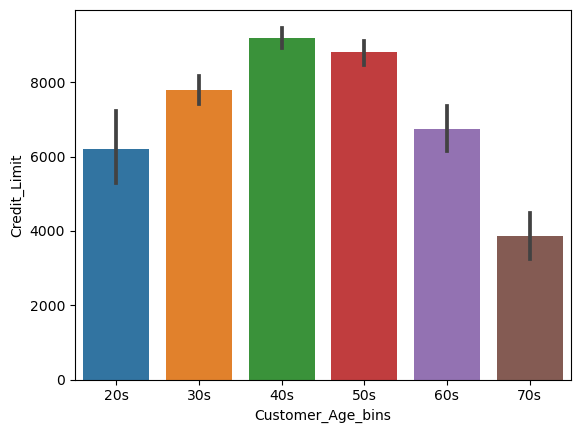

In [44]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean); #values on y-axis summarized using mean

bar height ends at mean value 

#### Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

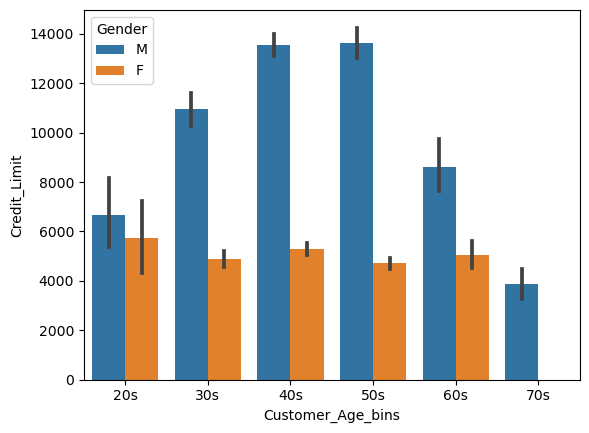

In [45]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean,hue='Gender');

shows Cred limit for F is much less compared to M of the same age group

C:\Users\athul\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

C:\Users\athul\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



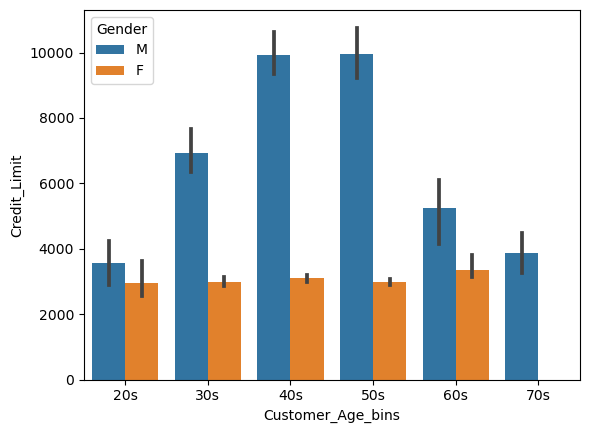

In [46]:
#  Let's swap that using the `estimator` parameter.
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.median,hue='Gender');

In [47]:
# For bar charts without error bars, do a quick aggregation
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

,Customer_Age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


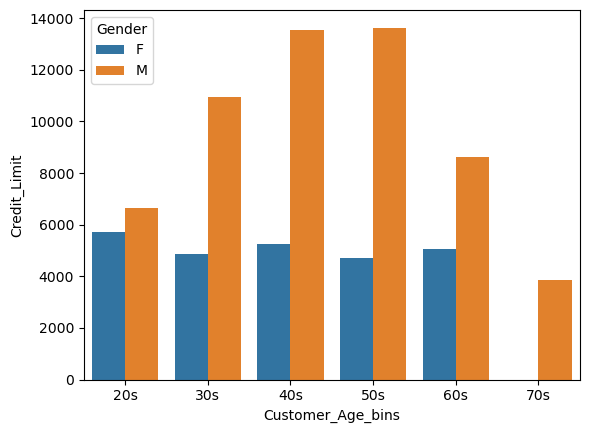

In [48]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=barplot, estimator=np.mean,hue='Gender');

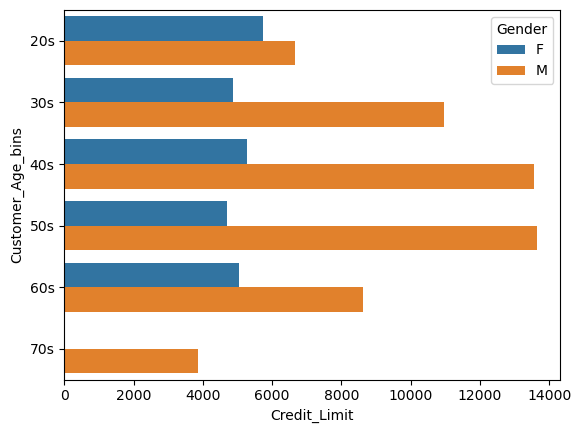

In [49]:
# We can turn the visual so that the bars go horizontally with just one parameter change. 
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', data=barplot, estimator=np.mean,hue='Gender',orient='h');

In [50]:
# when categories are too close with too less differmece between the hheghts,then lollipop chart is better
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


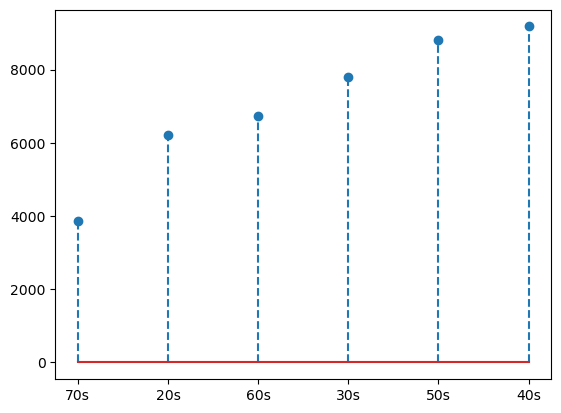

In [51]:
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--'); # stem plot withx,y,lineformat;here "--"

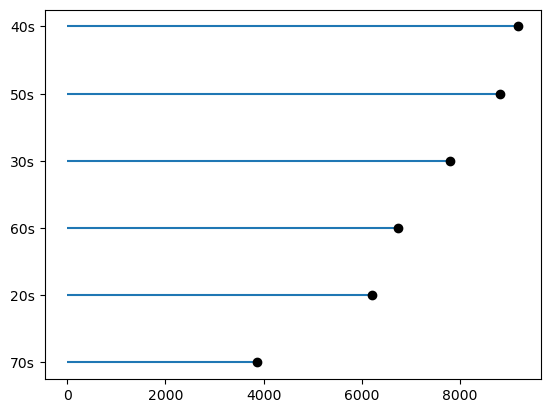

In [52]:
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], "o", color='black'); #plots the points as black circles

### 04_07 Data Visualisation : Tables 

In [53]:
# pivot==groupby in pandas

# to aggregate  based on attrition flag  with no of customers in each group and their mean age,mean ep count and a son...

data.groupby([ 'Attrition_Flag']).agg({
               'CLIENTNUM':'nunique',
               'Customer_Age': 'mean', 
               'Dependent_count': 'mean',
               'Months_on_book': 'mean',
               'Total_Relationship_Count': 'mean',
               'Months_Inactive_12_mon': 'mean',
               'Contacts_Count_12_mon': 'mean',
               'Credit_Limit': 'mean',
               'Total_Revolving_Bal': 'mean',
               'Avg_Open_To_Buy': 'mean',
               'Total_Amt_Chng_Q4_Q1': 'mean',
               'Total_Trans_Amt': 'mean',
               'Total_Trans_Ct': 'mean',
               'Total_Ct_Chng_Q4_Q1': 'mean',
               'Avg_Utilization_Ratio': 'mean'
            })

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,1627,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,8500,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [54]:
data_pivot=data.groupby([ 'Attrition_Flag']).agg({
               'CLIENTNUM':'nunique',
               'Customer_Age': 'mean', 
               'Dependent_count': 'mean',
               'Months_on_book': 'mean',
               'Total_Relationship_Count': 'mean',
               'Months_Inactive_12_mon': 'mean',
               'Contacts_Count_12_mon': 'mean',
               'Credit_Limit': 'mean',
               'Total_Revolving_Bal': 'mean',
               'Avg_Open_To_Buy': 'mean',
               'Total_Amt_Chng_Q4_Q1': 'mean',
               'Total_Trans_Amt': 'mean',
               'Total_Trans_Ct': 'mean',
               'Total_Ct_Chng_Q4_Q1': 'mean',
               'Avg_Utilization_Ratio': 'mean'
            }).T
data_pivot

Attrition_Flag,Attrited Customer,Existing Customer
CLIENTNUM,1627.000000,8500.000000
Customer_Age,46.659496,46.262118
Dependent_count,2.402581,2.335412
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Total_Revolving_Bal,672.822987,1256.604118
Avg_Open_To_Buy,7463.216472,7470.273400


In [55]:
data_pivot['Diff']=data_pivot['Attrited Customer']/data_pivot['Existing Customer']-1 
#subtracting 1 gives % change eg.if0.10 ,-1 gives -.90=-90%

data_pivot.sort_values("Diff")

Attrition_Flag,Attrited Customer,Existing Customer,Diff
CLIENTNUM,1627.000000,8500.000000,-0.808588
Total_Revolving_Bal,672.822987,1256.604118,-0.464570
Avg_Utilization_Ratio,0.162475,0.296412,-0.451860
Total_Trans_Ct,44.933620,68.672588,-0.345683
Total_Trans_Amt,3095.025814,4654.655882,-0.335069
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,-0.253286
Total_Relationship_Count,3.279656,3.914588,-0.162196
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,-0.101271
Credit_Limit,8136.039459,8726.877518,-0.067703
Avg_Open_To_Buy,7463.216472,7470.273400,-0.000945


`Total_Revolving_Bal` `Avg_Utilization_Ratio` along with `Total_Trans_Ct` and `Total_Trans_Amt` show the biggest differences, all showing 30% or more below Existing Customers. 

### 04_08 Relationships
We can do this quickly for the whole numerical dataset (or a subset) using a [pairplot] or [pairgrid]

When thinking about correlation, there can be several outcomes: 

    1) Weak, strong or no correlation
    2) Positive or negative
    
Thus, you can have weak (or strong) positive, weak (or strong) negative, or no correlation. Scatter plots along with a correlation coefficient can help us understand this relationship more. 

**Remember**: Correlation does not imply causation. 

In [56]:
# simplify to just the numerical data
numeric_data = data._get_numeric_data()

numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Normalized', 'Credit_Limit_Log_Transformed'],
      dtype='object')

In [57]:
# remove unwanted
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

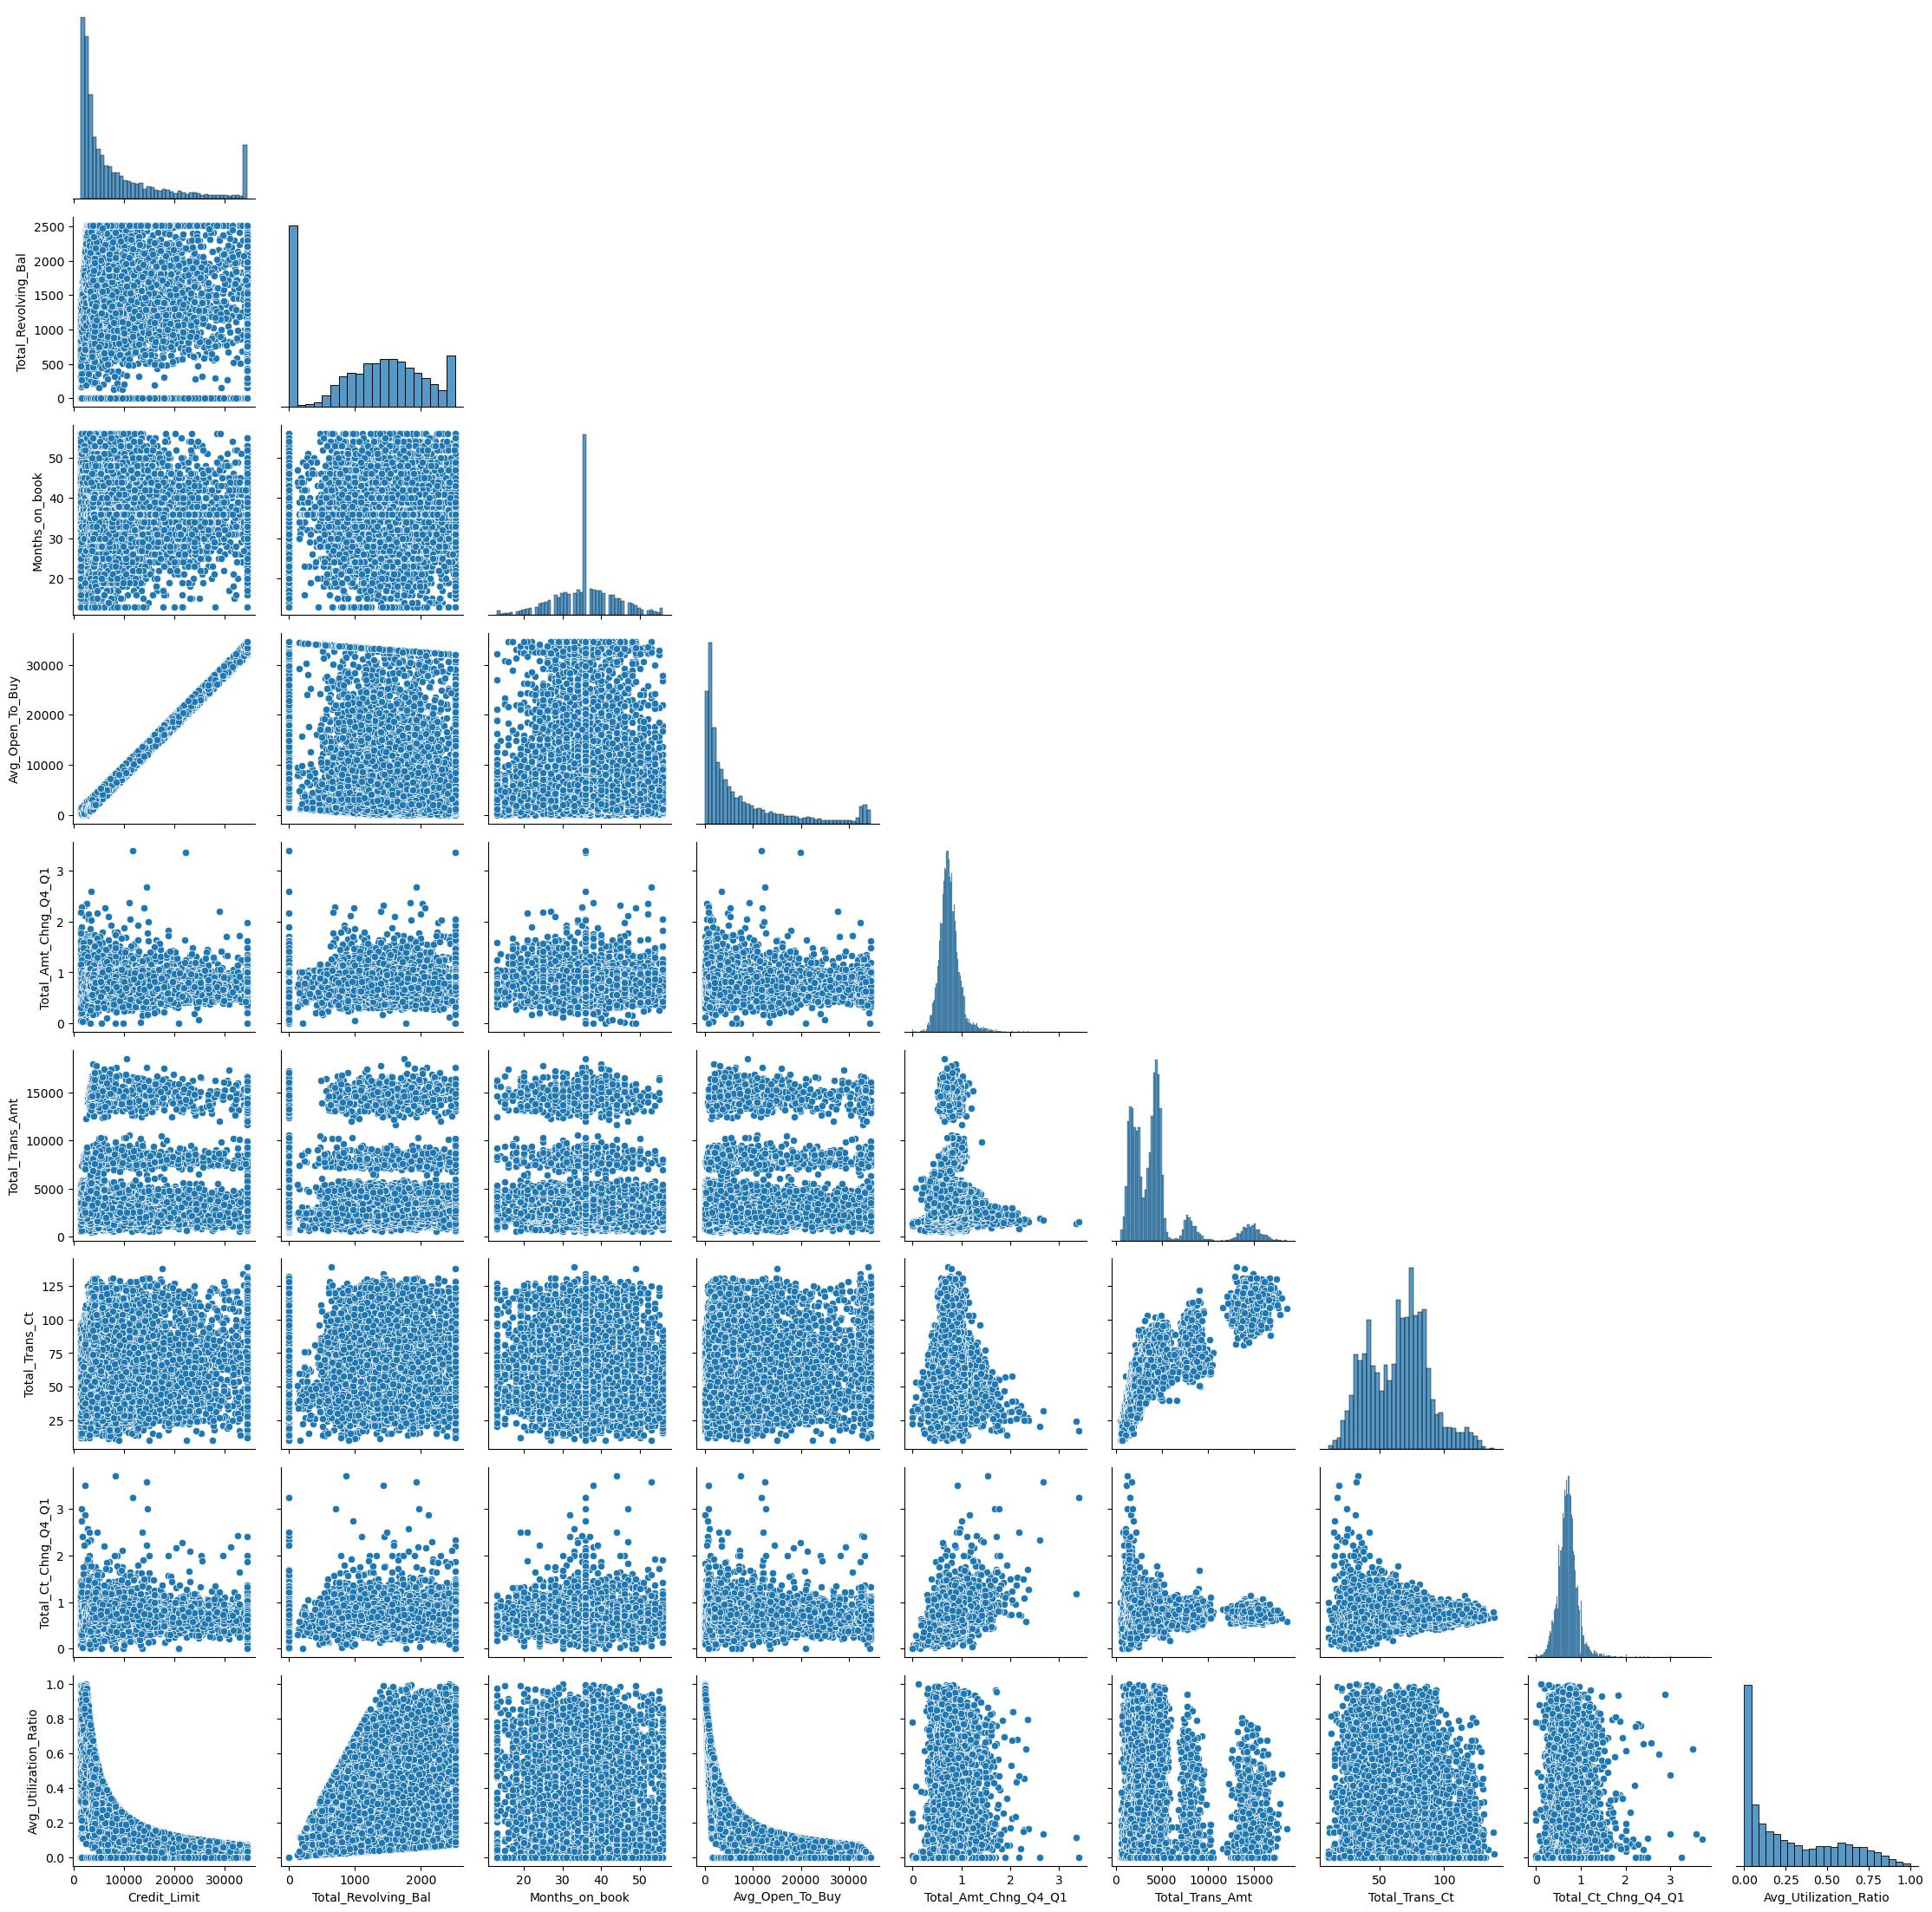

In [58]:
g=sns.PairGrid(numeric_data, diag_sharey=False, corner=True)#specifies that y-axes of diagonal histogram should not be shared.
# corner=True upper triangle of the PairGrid should be empty,cz it will be same as bottom

g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

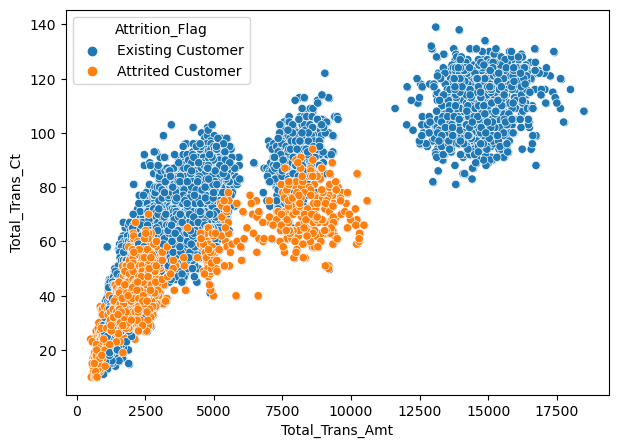

In [59]:
# trans amt and trans count reln looks insighting.so detail examination
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data);

# giving attrition as hue 
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag',data=data);


Finding #1: No Customers with trans amt>11000 left :-)

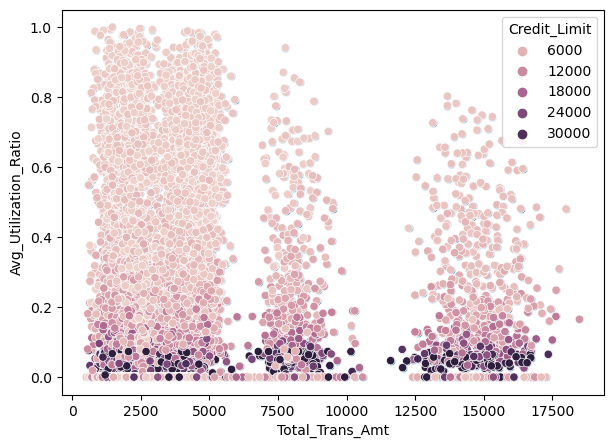

In [60]:
# trans amt and trans count reln looks insighting.so detail examination
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt', y='Avg_Utilization_Ratio', data=data);

# giving attrition as hue 
sns.scatterplot(x='Total_Trans_Amt', y='Avg_Utilization_Ratio', hue='Credit_Limit',data=data);

### 04_09 Ridge Plot

In [61]:
bins = [0, 11000, 900000]
labels = ['Group 1', 'Group 2']
data['Total_Trans_Amt_bin'] = pd.cut(data['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [58]:
data.groupby([ 'Attrition_Flag','Total_Trans_Amt_bin']).agg({
               'CLIENTNUM':'nunique',
               'Customer_Age': 'mean', 
               'Dependent_count': 'mean',
               'Months_on_book': 'mean',
               'Total_Relationship_Count': 'mean',
               'Months_Inactive_12_mon': 'mean',
               'Contacts_Count_12_mon': 'mean',
               'Credit_Limit': 'mean',
               'Total_Revolving_Bal': 'mean',
               'Avg_Open_To_Buy': 'mean',
               'Total_Amt_Chng_Q4_Q1': 'mean',
               'Total_Trans_Ct': 'mean',
               'Total_Ct_Chng_Q4_Q1': 'mean',
               'Avg_Utilization_Ratio': 'mean'
            }).T

Attrition_Flag           Attrited Customer         Existing Customer  \
Total_Trans_Amt_bin                Group 1 Group 2           Group 1   
CLIENTNUM                      1627.000000     0.0       7753.000000   
Customer_Age                     46.659496     NaN         46.373920   
Dependent_count                   2.402581     NaN          2.341545   
Months_on_book                   36.178242     NaN         35.964272   
Total_Relationship_Count          3.279656     NaN          4.064620   
Months_Inactive_12_mon            2.693301     NaN          2.279376   
Contacts_Count_12_mon             2.972342     NaN          2.369018   
Credit_Limit                   8136.039459     NaN       8213.629808   
Total_Revolving_Bal             672.822987     NaN       1245.908165   
Avg_Open_To_Buy                7463.216472     NaN       6967.721643   
Total_Amt_Chng_Q4_Q1              0.694277     NaN          0.772248   
Total_Trans_Ct                   44.933620     NaN         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386     NaN          0.741687   
Avg_Utilization_Ratio             0.162475     NaN          0.307600   

Attrition_Flag                          
Total_Trans_Amt_bin            Group 2  
CLIENTNUM                   747.000000  
Customer_Age                 45.101740  
Dependent_count               2.271754  
Months_on_book               35.012048  
Total_Relationship_Count      2.357430  
Months_Inactive_12_mon        2.215529  
Contacts_Count_12_mon         2.224900  
Credit_Limit              14053.797858  
Total_Revolving_Bal        1367.615797  
Avg_Open_To_Buy           12686.182062  
Total_Amt_Chng_Q4_Q1          0.775229  
Total_Trans_Ct              110.336011  
Total_Ct_Chng_Q4_Q1           0.750190  
Avg_Utilization_Ratio         0.180288

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

    1) Total_Revolving_Bal (still a good indicator)
    2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)
    3) Total_Trans_Ct (still a good indicator)
    4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)

But also notice how the Q4-Q1 change is significantly different for Churned customers too! This indicates that churned customers are spending significantly less (-25% lower than their counterparts) after the holiday season, pulling back much more sigificantly. This is something we can probably build a recommendation off of. If we can impact this variable, we can also directly impact the `Total_Trans_Ct`! 

`seaborn`'s `FacetGrid` method allow to build subplot and use a `Kernal Density Plot` (which is just a continuous or smoother distribution of our original hisograms)

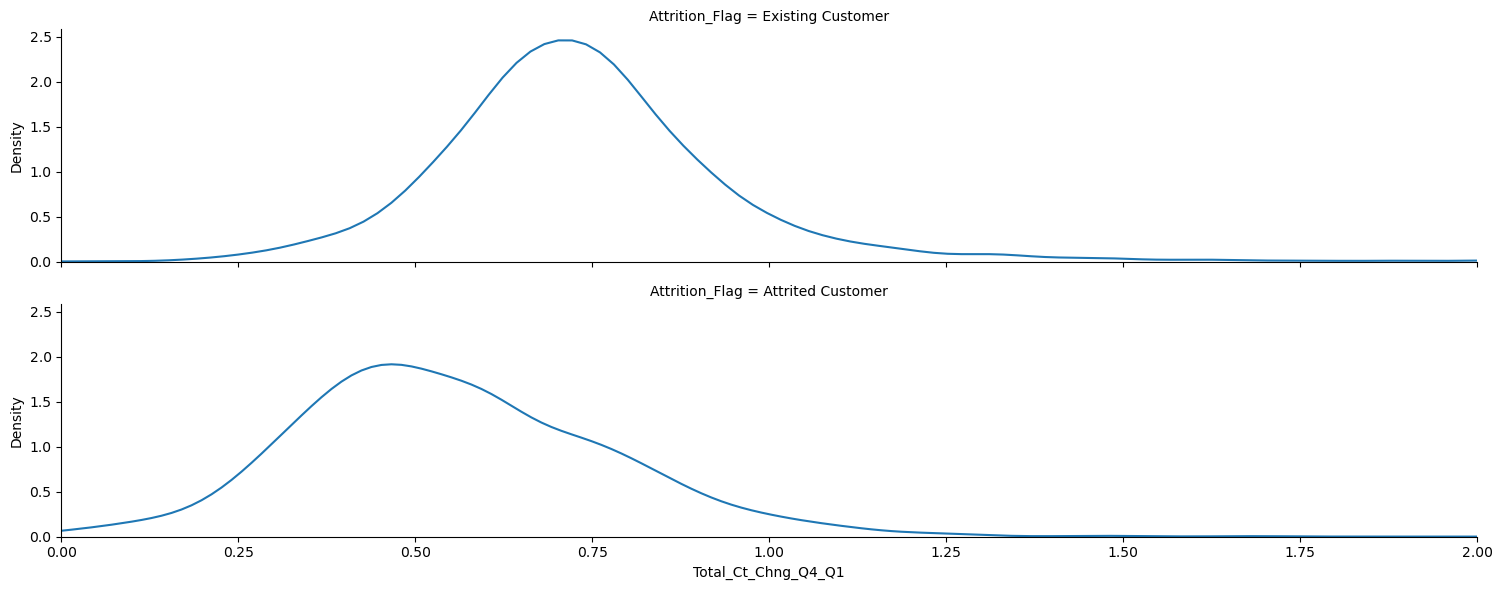

In [59]:
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1")

plt.xlim(0,2);

## Putting Altogether

Let's start to declutter our final scatterplot and start by doing the following: 

    1) Changing the background color to white (effectively removing the gridlines)
    2) Removing the border

In [60]:
sns.set_theme(style="white") #set theme white
palette = sns.color_palette("Set2", 12)

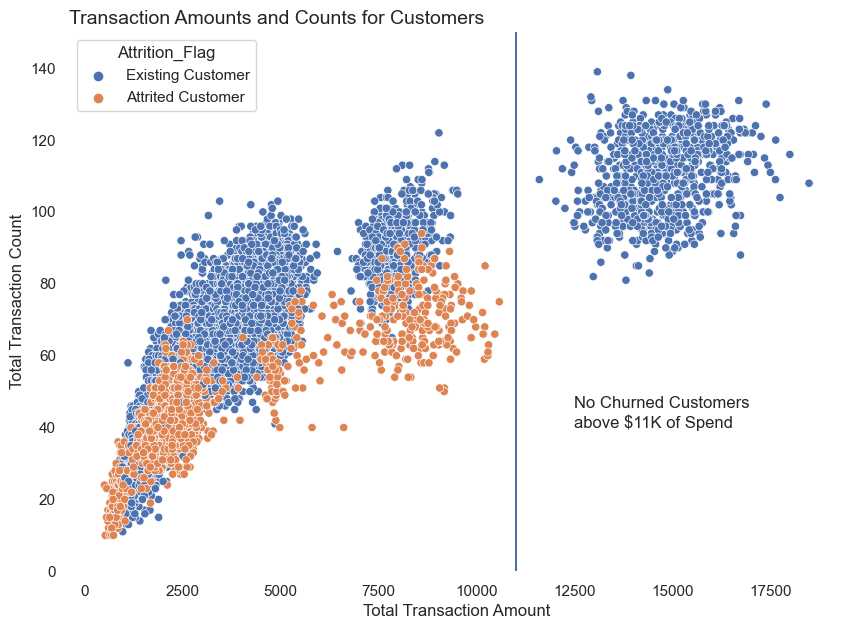

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=data, hue='Attrition_Flag')

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150); # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14); # title

plt.vlines(11000,0,150) # adds in a vertical line at the $11k mark
plt.text(12500, 40, "No Churned Customers \nabove $11K of Spend"); # annotation

(0.0, 2.0)

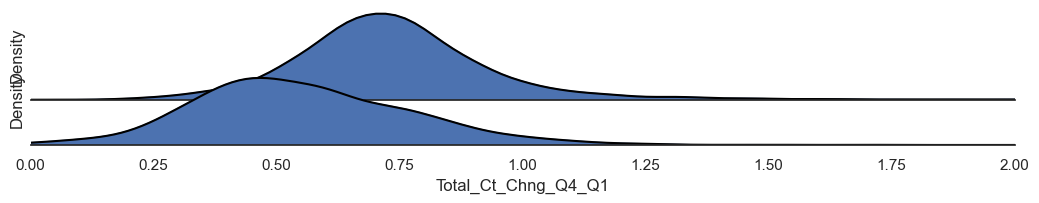

In [64]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(data, row="Attrition_Flag", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[]) #removes the y-axis tick marks and labels
g.despine(left=True) #removes the spines (axes lines) from the left side of all the subplots

plt.xlim(0,2)

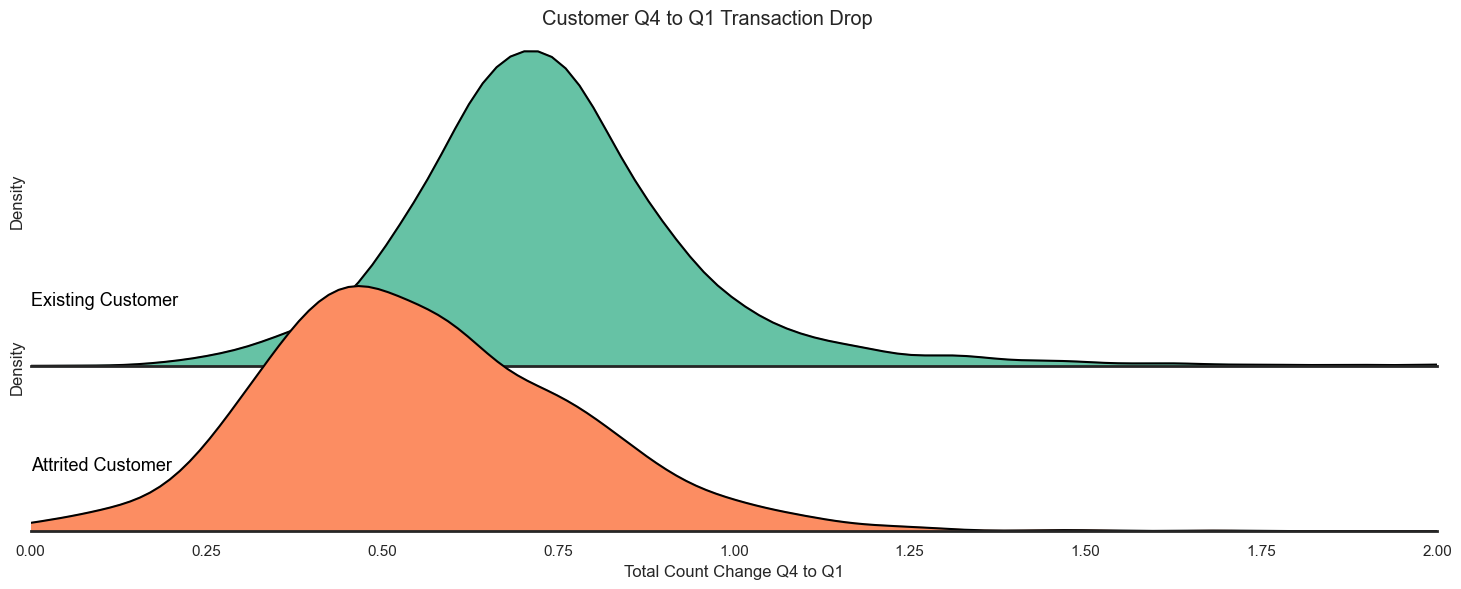

In [65]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(data, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

In [66]:
# maintain these customers
data[(data['Total_Trans_Amt_bin']=='Group 1') & 
     (data['Total_Ct_Chng_Q4_Q1']<0.70) & 
     (data['Attrition_Flag']=='Existing Customer')
    ]['CLIENTNUM'].nunique()

3535

In [67]:
# reengage
data[(data['Total_Trans_Amt_bin']=='Group 1') & 
     (data['Total_Ct_Chng_Q4_Q1']<0.70) & 
     (data['Attrition_Flag']!='Existing Customer')
    ]['CLIENTNUM'].nunique()

1233

In [68]:
data.groupby('Total_Trans_Amt_bin')['Months_on_book'].median()

Total_Trans_Amt_bin
Group 1    36.0
Group 2    36.0
Name: Months_on_book, dtype: float64

## Suggestions
1.Customer Survey

2.Loyalty points,cash back

3.Prev. maketing campaigns